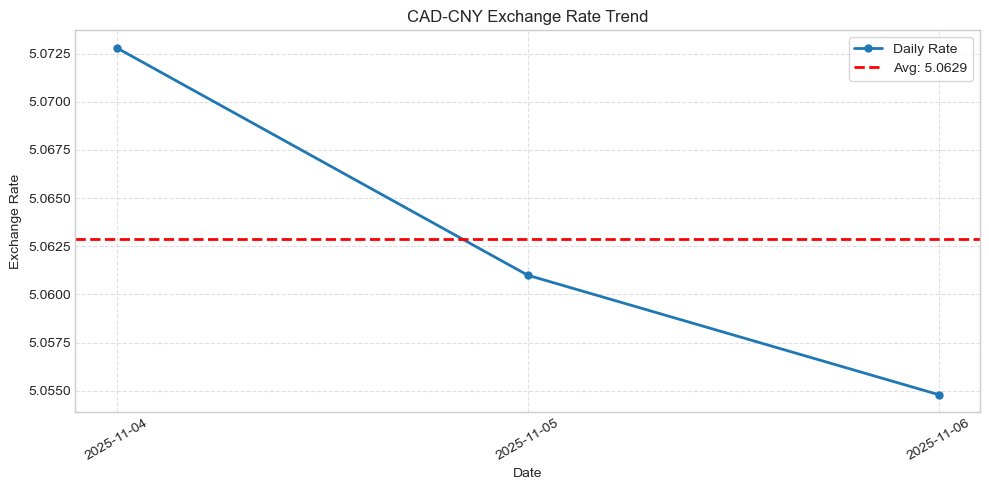

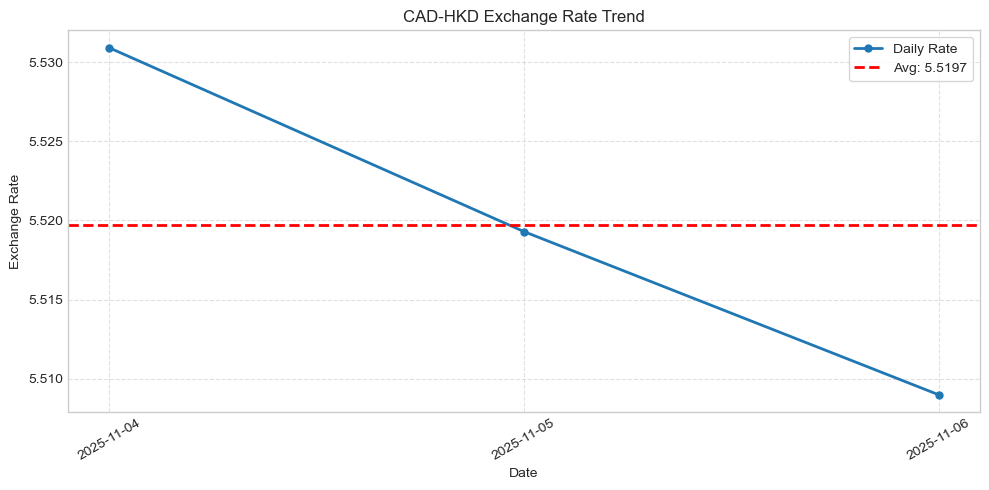

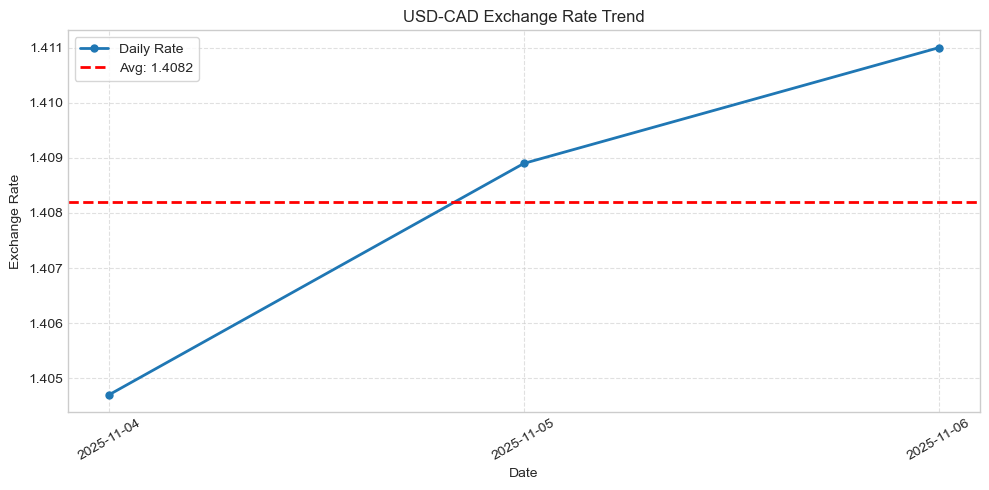

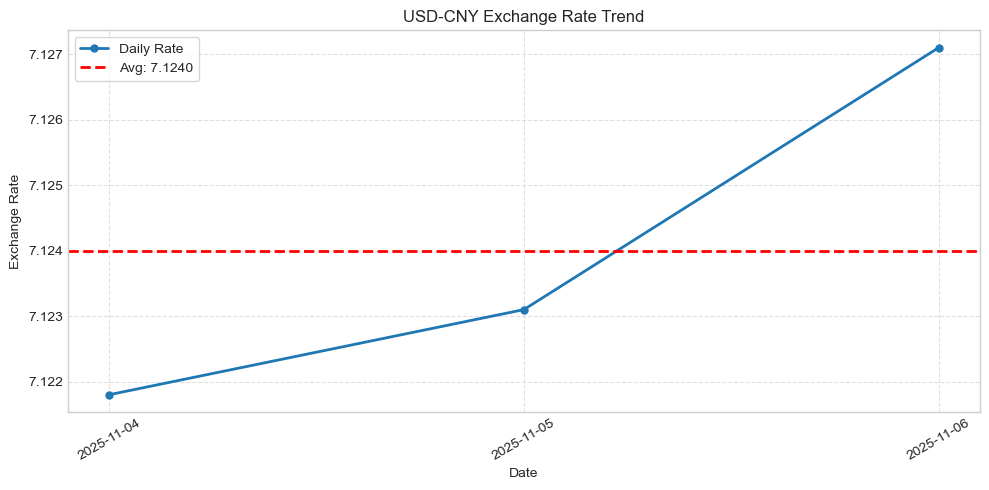

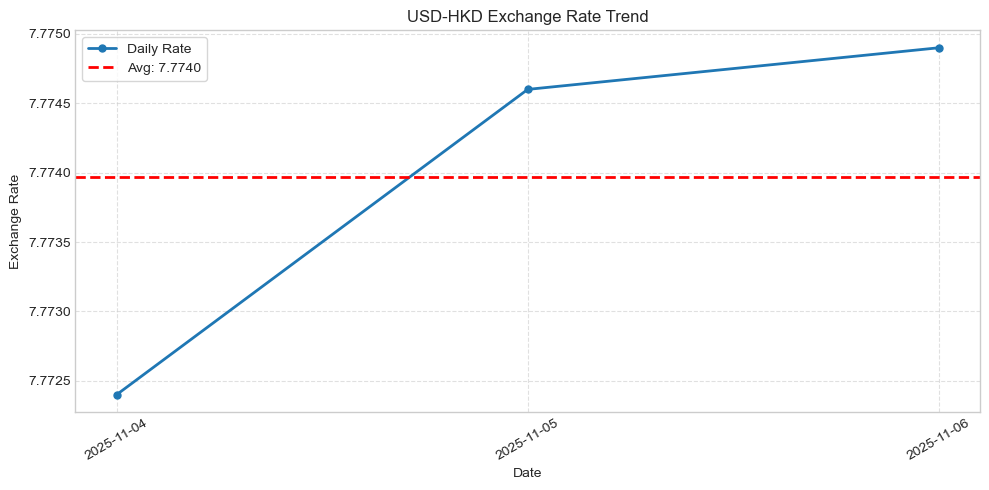

In [28]:
import re
import pandas as pd
import matplotlib.pyplot as plt

LOG_FILE = "rates_log.txt"

pattern = re.compile(r"^([A-Z\-]+): (\d{4}-\d{2}-\d{2}): ([0-9.]+)$")
rows = []

with open(LOG_FILE, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        match = pattern.match(line)
        if match:
            pair, date_str, rate_str = match.groups()
            rows.append((pair, date_str, float(rate_str)))

df = pd.DataFrame(rows, columns=["pair", "date_str", "rate"])

def get_transfer_suggestion(pair: str, latest: float, avg: float) -> str:
    diff = latest - avg
    if abs(diff) < 0.001:
        return "Stable — Hold"

    if pair == "USD-CAD":
        return "Transfer CAD → USD (USD stronger)" if diff > 0 else "Transfer USD → CAD (CAD stronger)"
    elif pair == "USD-CNY":
        return "Transfer CAD → USD (USD stronger)" if diff > 0 else "Transfer USD → CAD (CAD stronger)"
    elif pair == "USD-HKD":
        return "Transfer CAD → USD (USD stronger)" if diff > 0 else "Transfer USD → CAD (CAD stronger)"
    elif pair == "CAD-CNY":
        return "Transfer CAD → CNY (CAD stronger)" if diff > 0 else "Transfer CNY → CAD (CAD weaker)"
    elif pair == "CAD-HKD":
        return "Transfer CAD → HKD (CAD stronger)" if diff > 0 else "Transfer HKD → CAD (CAD weaker)"
    else:
        return "No rule defined"

pairs = sorted(df["pair"].unique())

for pair in pairs:
    subset = df[df["pair"] == pair].sort_values("date_str")

    avg_rate = subset["rate"].iloc[-7:].mean() if len(subset) >= 7 else subset["rate"].mean()
    latest_rate = subset["rate"].iloc[-1]
    recommendation = get_transfer_suggestion(pair, latest_rate, avg_rate)

    plt.figure(figsize=(10, 5))
    plt.plot(subset["date_str"], subset["rate"], marker="o", linewidth=2, markersize=5, label="Daily Rate")
    plt.axhline(y=avg_rate, color="red", linestyle="--", linewidth=2, label=f"Avg: {avg_rate:.4f}")
    plt.title(f"{pair} Exchange Rate Trend")
    plt.xlabel("Date")
    plt.ylabel("Exchange Rate")
    plt.xticks(rotation=30)
    plt.grid(True, linestyle="--", alpha=0.6)

    handles, labels = plt.gca().get_legend_handles_labels()
    labels.append(f"{recommendation}")
    plt.legend(handles=handles, labels=labels, loc="best", frameon=True)

    plt.tight_layout()
    plt.show()

In [ ]:
# import re
# from datetime import datetime

# LOG_FILE = "rates_log.txt"
# OUTPUT_FILE = "rates_log_daily.txt"

# # pattern: "USD-CAD: 2025-11-05 08 EST: 1.4089"
# pattern = re.compile(r"^([A-Z\-]+): (\d{4}-\d{2}-\d{2}) \d{2} [A-Z]+: ([0-9.]+)$")

# seen = set()
# unique_lines = []

# with open(LOG_FILE, "r", encoding="utf-8") as f:
#     for line in f:
#         line = line.strip()
#         match = pattern.match(line)
#         if match:
#             pair, date, rate = match.groups()
#             key = (pair, date)
#             # Keep only the first occurrence per pair per day
#             if key not in seen:
#                 seen.add(key)
#                 # Remove hour → keep date only
#                 new_line = f"{pair}: {date}: {rate}"
#                 unique_lines.append(new_line)

# # Preserve original order
# with open(OUTPUT_FILE, "w", encoding="utf-8") as f:
#     for line in unique_lines:
#         f.write(line + "\n")
